# Name : Mann Dsylva
# Roll no : 24mai009
# Assignment-2
# 1) **Use the placement dataset to make model which can predict whether one will get placed or not and find out the probabilty of getting placed.**


In [1]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix


In [2]:
import pandas as pd

# Load the dataset
url = "https://drive.google.com/uc?id=1EcG8Xly3tHliCDt_Hvi93hVztXceHDFm"  # Direct link
data = pd.read_csv(url)


data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

# Check if 'status' column has 'Not Placed' values
not_placed = data[data['status'] == 'Not Placed']

# Display the count of entries not placed
count_not_placed = not_placed.shape[0]
print(f"Number of entries with status 'Not Placed': {count_not_placed}")


Missing values in each column:
salary    67
dtype: int64
Number of entries with status 'Not Placed': 67


In [4]:
# Check unique values in the 'status' column
print(data['status'].unique())

['Placed' 'Not Placed']


In [5]:
# Check unique values in the 'status' column and their lengths
unique_statuses = data['status'].unique()
for status in unique_statuses:
    print(f"Value: '{status}' | Length: {len(str(status))}")

Value: 'Placed' | Length: 6
Value: 'Not Placed' | Length: 10


In [6]:
# Convert the 'status' column to string type before using .str
data['status'] = data['status'].astype(str)
# Strip whitespace and replace common unwanted characters
data['status'] = data['status'].str.strip().str.replace('not placed', 'not placed', regex=False)

data['status'] = data['status'].str.replace('[^a-zA-Z ]', '', regex=True)
data['status'] = data['status'].str.lower()

In [7]:
# Map the cleaned 'status' column to binary values
data['status'] = data['status'].map({'placed': 1, 'not placed': 0})
print("Unique values after mapping:", data['status'].unique())

Unique values after mapping: [1 0]


In [8]:
# Define features (X) and target (y)
X = data.drop(columns=['status','salary'], axis=1)
y = data['status']

In [9]:
X.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50


In [10]:
y.head()

,status
0,1
1,1
2,1
3,0
4,1


In [11]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print(y_train.shape)
print(y_test.shape)

(172, 13)
(43, 13)
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
(172,)
(43,)


In [12]:
import numpy as np
# Check the data types of the columns in the features set
print(X_train.dtypes)

# Display the rows containing non-numeric values
non_numeric_rows = X_train[~X_train.applymap(np.isreal).all(axis=1)]
print("Rows with non-numeric values:")
non_numeric_rows


sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
dtype: object
Rows with non-numeric values:


<ipython-input-12-5b98ed82a955>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_rows = X_train[~X_train.applymap(np.isreal).all(axis=1)]


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
93,94,M,52.00,Central,62.0,Central,Commerce,54.0,Comm&Mgmt,No,72.00,Mkt&HR,55.41
84,85,M,70.00,Central,63.0,Others,Science,70.0,Sci&Tech,Yes,55.00,Mkt&Fin,62.00
95,96,M,73.00,Central,78.0,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16
137,138,M,67.00,Others,63.0,Central,Commerce,72.0,Comm&Mgmt,No,56.00,Mkt&HR,60.41
210,211,M,80.60,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,M,61.08,Others,50.0,Others,Science,54.0,Sci&Tech,No,71.00,Mkt&Fin,65.69
14,15,M,62.00,Central,47.0,Central,Commerce,50.0,Comm&Mgmt,No,76.00,Mkt&HR,54.96
92,93,F,60.23,Central,69.0,Central,Science,66.0,Comm&Mgmt,No,72.00,Mkt&Fin,59.47
179,180,F,77.80,Central,64.0,Central,Science,64.2,Sci&Tech,No,75.50,Mkt&HR,72.14


In [13]:
# Apply One-Hot Encoding to categorical features (if any)
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align the train and test data to have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [14]:
print(X_train_encoded.shape)
X_train_encoded.head()

(172, 15)


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
93,94,52.0,62.0,54.0,72.00,55.41,True,False,False,True,False,False,False,False,True
84,85,70.0,63.0,70.0,55.00,62.00,True,False,True,False,True,False,True,True,False
95,96,73.0,78.0,65.0,95.46,62.16,True,False,True,True,False,False,False,True,False
137,138,67.0,63.0,72.0,56.00,60.41,True,True,False,True,False,False,False,False,True
210,211,80.6,82.0,77.6,91.00,74.49,True,True,True,True,False,False,False,False,False


In [15]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [16]:
X_train_scaled.shape

(172, 15)

In [17]:
from sklearn.linear_model import LogisticRegression
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [18]:
#Accuracy score
print("Accuracy for training>>>>>>> ",model.score(X_train_scaled,y_train))
print("Accuracy for testing>>>>>>>> ",model.score(X_test_scaled,y_test))

Accuracy for training>>>>>>>  0.8953488372093024
Accuracy for testing>>>>>>>>  0.8372093023255814


In [19]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [20]:
feature_columns= X_train_encoded.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_columns)

feature_columns = X_train_scaled_df.columns
print("Features after scaling are>>>> ",feature_columns)

Features after scaling are>>>>  Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'gender_M',
       'ssc_b_Others', 'hsc_b_Others', 'hsc_s_Commerce', 'hsc_s_Science',
       'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR'],
      dtype='object')


In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix of training :")
print(confusion_matrix(y_train, model.predict(X_train_scaled)))
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("Confusion Matrix of testing :")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix of training :
[[ 45  10]
 [  8 109]]
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Confusion Matrix of testing :
[[ 7  5]
 [ 2 29]]


In [22]:
print("\nClassification Report of training:")
print(classification_report(y_train, model.predict(X_train_scaled)))
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print("\nClassification Report of testing:")
print(classification_report(y_test, y_pred))


Classification Report of training:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        55
           1       0.92      0.93      0.92       117

    accuracy                           0.90       172
   macro avg       0.88      0.87      0.88       172
weighted avg       0.89      0.90      0.89       172

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Classification Report of testing:
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.85      0.94      0.89        31

    accuracy                           0.84        43
   macro avg       0.82      0.76      0.78        43
weighted avg       0.83      0.84      0.83        43



In [23]:
ypred_prob = model.predict_proba(X_test_scaled)[:,1:2]
ypred_prob

array([[0.98382779],
       [0.99182194],
       [0.97486038],
       [0.15083597],
       [0.96898366],
       [0.02734815],
       [0.05422769],
       [0.99293797],
       [0.99644826],
       [0.99876605],
       [0.74897826],
       [0.9770613 ],
       [0.14004418],
       [0.90520969],
       [0.99914067],
       [0.50109747],
       [0.99984323],
       [0.45191607],
       [0.16806644],
       [0.99846321],
       [0.99585175],
       [0.99875504],
       [0.23309642],
       [0.01995857],
       [0.97716617],
       [0.9976832 ],
       [0.46154254],
       [0.96057293],
       [0.84701109],
       [0.84473376],
       [0.98736997],
       [0.85542219],
       [0.74268586],
       [0.97974422],
       [0.96007005],
       [0.99492171],
       [0.56715416],
       [0.68639168],
       [0.99723271],
       [0.96847732],
       [0.99784324],
       [0.98535619],
       [0.98946869]])

In [24]:
from sklearn.metrics import roc_auc_score,roc_curve
#Area_under_curve
auc = roc_auc_score(y_test,ypred_prob)
print(auc)

0.9327956989247311


In [25]:
fpr,tpr,thresh = roc_curve(y_test,ypred_prob)

print(fpr)

[0.         0.         0.         0.08333333 0.08333333 0.16666667
 0.16666667 0.25       0.25       0.66666667 0.66666667 1.        ]


In [26]:
print(tpr)

[0.         0.03225806 0.80645161 0.80645161 0.83870968 0.83870968
 0.87096774 0.87096774 0.93548387 0.93548387 1.         1.        ]


In [27]:
print(thresh)

[       inf 0.99984323 0.96007005 0.90520969 0.85542219 0.84701109
 0.84473376 0.74897826 0.68639168 0.23309642 0.15083597 0.01995857]


In [28]:
new_data = pd.DataFrame({
    'sl_no': [100],                # Example candidate serial number
    'ssc_p': [55.0],               # SSC percentage
    'hsc_p': [68.0],               # HSC percentage
    'degree_p': [65.0],            # Degree percentage
    'etest_p': [62.0],             # Employability test percentage
    'mba_p': [68.0],               # MBA percentage
    'gender_M': [0],               # 1 for Male, 0 for Female
    'ssc_b_Others': [0],           # 1 if SSC board is Others, 0 otherwise
    'hsc_b_Others': [0],           # 1 if HSC board is Others, 0 otherwise
    'hsc_s_Commerce': [0],         # 1 for Commerce stream, 0 otherwise
    'hsc_s_Science': [1],          # 1 for Science stream, 0 otherwise
    'degree_t_Others': [0],        # 1 if degree type is Others, 0 otherwise
    'degree_t_Sci&Tech': [1],      # 1 if degree type is Science & Technology, 0 otherwise
    'workex_Yes': [1],             # 1 if the candidate has work experience, 0 otherwise
    'specialisation_Mkt&HR': [1]   # 1 if specialization is Marketing & HR, 0 otherwise
})
new_data_scaled = scaler.transform(new_data)

prediction = model.predict(new_data_scaled)
probability = model.predict_proba(new_data_scaled)

print(f"Predicted class: {prediction[0]}")
print(f"Class probabilities: {probability}")

Predicted class: 0
Class probabilities: [[0.8638934 0.1361066]]


In [29]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier()

kmodel.fit(X_train_scaled,y_train)

ypred_prob_knn = kmodel.predict_proba(X_test_scaled)[:,1:2]

auc_knn = roc_auc_score(y_test,ypred_prob_knn)
print(auc_knn)

fpr_knn,tpr_knn,thresh_knn = roc_curve(y_test,ypred_prob_knn)

0.8629032258064516


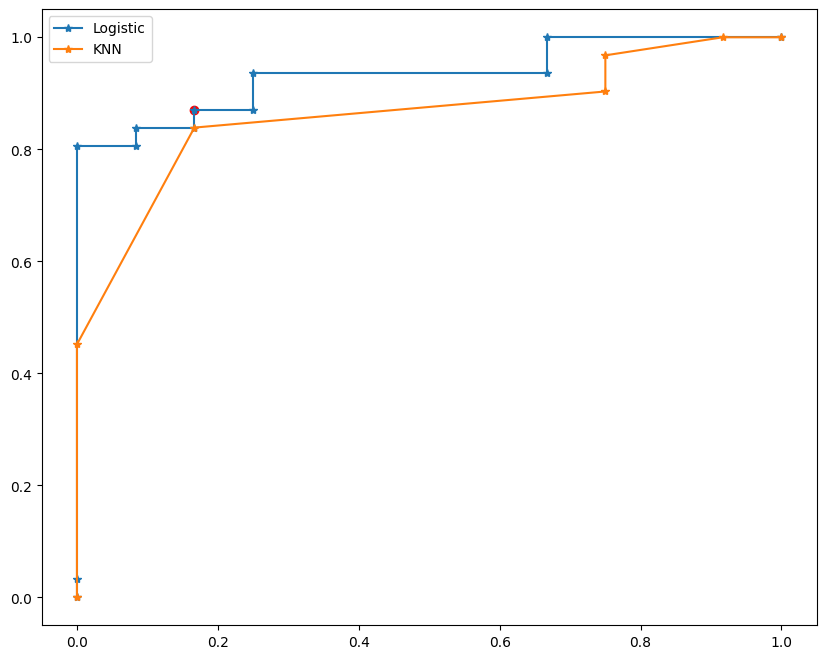

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,marker='*',label='Logistic')
plt.plot(fpr_knn,tpr_knn,marker='*',label='KNN')
plt.scatter(fpr[6] , tpr[6] , c='r')
plt.legend()
plt.show()

# **2) Predicting the salary of a candidate if placed.**

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = "https://drive.google.com/uc?id=1EcG8Xly3tHliCDt_Hvi93hVztXceHDFm"  # Direct link
data = pd.read_csv(url)

In [49]:
# Strip whitespace and replace common unwanted characters
data['status'] = data['status'].str.strip().str.replace('not placed', 'not placed', regex=False)

data['status'] = data['status'].str.replace('[^a-zA-Z ]', '', regex=True)
data['status'] = data['status'].str.lower()
# Map the cleaned 'status' column to binary values
data['status'] = data['status'].map({'placed': 1, 'not placed': 0})
print("Unique values after mapping:", data['status'].unique())

Unique values after mapping: [1 0]


In [50]:
# Define features (X) and target (y)
X = data.drop(columns=['salary'], axis=1)
y = data['salary']

In [51]:
X.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1


In [52]:
y.head()

,salary
0,270000.0
1,200000.0
2,250000.0
3,NaN
4,425000.0


In [53]:
y.fillna(0, inplace=True)
y.head()

,salary
0,270000.0
1,200000.0
2,250000.0
3,0.0
4,425000.0


In [54]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
print(y_train.shape)
print(y_test.shape)

(172, 14)
(43, 14)
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
(172,)
(43,)


In [55]:
# Apply One-Hot Encoding to categorical features (if any)
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align the train and test data to have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [56]:
print(X_train_encoded.shape)
X_train_encoded.head()

(172, 16)


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
93,94,52.0,62.0,54.0,72.00,55.41,0,True,False,False,True,False,False,False,False,True
84,85,70.0,63.0,70.0,55.00,62.00,1,True,False,True,False,True,False,True,True,False
95,96,73.0,78.0,65.0,95.46,62.16,1,True,False,True,True,False,False,False,True,False
137,138,67.0,63.0,72.0,56.00,60.41,1,True,True,False,True,False,False,False,False,True
210,211,80.6,82.0,77.6,91.00,74.49,1,True,True,True,True,False,False,False,False,False


In [63]:
# Scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

salary_model = LinearRegression()
salary_model.fit(X_train_scaled, y_train)

LinearRegression()

In [64]:
#Accuracy score
print("Accuracy for training>>>>>>> ",salary_model.score(X_train_scaled,y_train))
print("Accuracy for testing>>>>>>>> ",salary_model.score(X_test_scaled,y_test))

Accuracy for training>>>>>>>  0.7845055811038226
Accuracy for testing>>>>>>>>  0.7180204468784017


In [66]:
y_pred = salary_model.predict(X_test_scaled)

In [67]:
feature_columns= X_train_encoded.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_columns)

feature_columns = X_train_scaled_df.columns
print("Features after scaling are>>>> ",feature_columns)

Features after scaling are>>>>  Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'status',
       'gender_M', 'ssc_b_Others', 'hsc_b_Others', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Others', 'degree_t_Sci&Tech', 'workex_Yes',
       'specialisation_Mkt&HR'],
      dtype='object')


In [79]:
new_data = pd.DataFrame({
    'sl_no': [10],
    'ssc_p': [85.0],
    'hsc_p': [88.0],
    'degree_p': [85.0],
    'etest_p': [92.0],
    'mba_p': [88.0],
    'status': [1],
    'gender_M': [0],               # 1 for Male, 0 for Female
    'ssc_b_Others': [0],           # 1 if SSC board is Others, 0 otherwise
    'hsc_b_Others': [0],           # 1 if HSC board is Others, 0 otherwise
    'hsc_s_Commerce': [0],         # 1 for Commerce stream, 0 otherwise
    'hsc_s_Science': [1],          # 1 for Science stream, 0 otherwise
    'degree_t_Others': [0],        # 1 if degree type is Others, 0 otherwise
    'degree_t_Sci&Tech': [1],      # 1 if degree type is Science & Technology, 0 otherwise
    'workex_Yes': [1],             # 1 if the candidate has work experience, 0 otherwise
    'specialisation_Mkt&HR': [1],   # 1 if specialization is Marketing & HR, 0 otherwise
})
new_data_scaled = scaler.transform(new_data)

prediction = salary_model.predict(new_data_scaled)
prediction

array([351959.8987797])